In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("../Data/Google_Stock_Price_Train.csv",index_col='Date', parse_dates=['Date'])

In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [9]:
df["Close"]=df["Close"].apply(lambda x:float(x.replace(",","")))
df["Volume"]=df["Volume"].apply(lambda x:float(x.replace(",","")))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [11]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
df.shape

(1258, 5)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

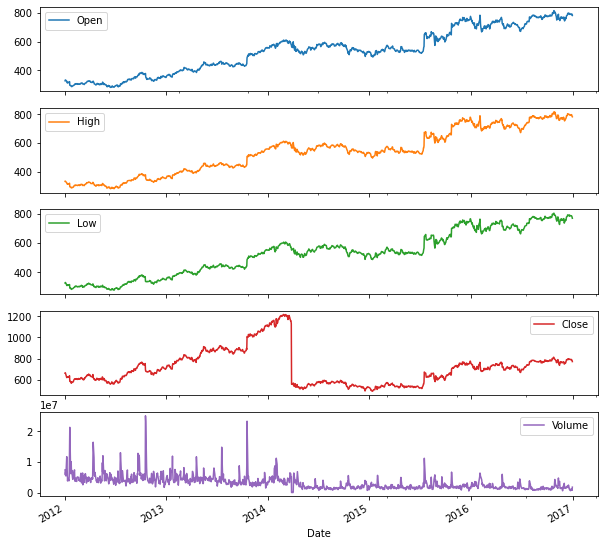

In [13]:
df.plot(subplots=True,figsize=(10,10))

The shape of the curve for ‘Open’, ‘Close’, ‘High’ and ‘Low’ data have the same shape. Only the ‘Volume’ has a different shape.

<AxesSubplot:xlabel='Date'>

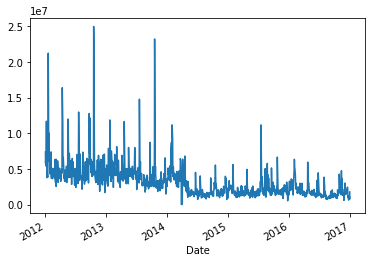

In [14]:
df['Volume'].plot()

### Seasonality

The line plot is great for showing seasonality. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality. Here I am making a bar plot of month data for 2016 and 2017. For the index, [2016:]. Because our dataset contains data until 2017. So, 2016 to end should bring 2016 and 2017.

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html">Link for Pandas Resample<a>

<BarContainer object of 12 artists>

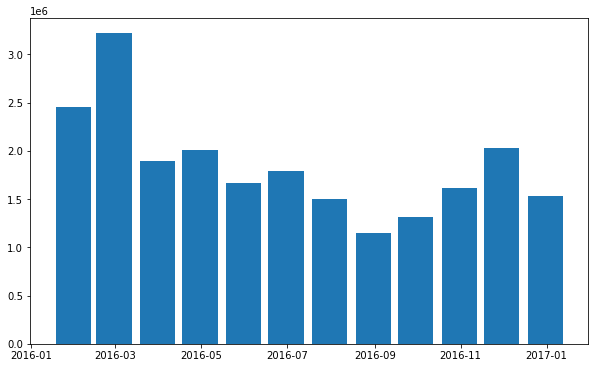

In [15]:
df_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_month['2016':].index, df_month.loc['2016':, "Volume"], width=25, align='center')

<AxesSubplot:xlabel='Date'>

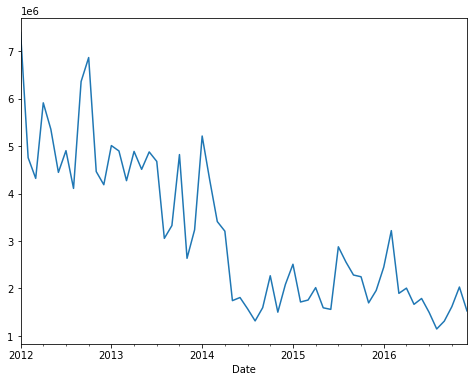

In [16]:
df_month['Volume'].plot(figsize=(8, 6))

In [17]:
week = df.resample("W").mean()

In [18]:
week

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-08,328.6725,331.5550,326.1550,658.8725,6281525.0
2012-01-15,314.5440,315.8180,309.5220,623.5280,6745360.0
2012-01-22,310.1025,311.0825,306.4700,620.0625,10816600.0
2012-01-29,288.1800,289.8980,285.0720,575.2240,7347380.0
2012-02-05,291.0620,292.2040,288.7000,582.4160,4969180.0
...,...,...,...,...,...
2016-12-04,760.7260,768.9740,752.6000,759.1080,2133620.0
2016-12-11,767.1840,774.3400,762.4580,771.7060,1631180.0
2016-12-18,794.8160,800.6980,790.9820,794.2180,2004760.0


Rolling is another very helpful way of smoothing out the curve. It takes the average of a specified amount of data. If I want a 7-day rolling, it gives us the 7-d average data.

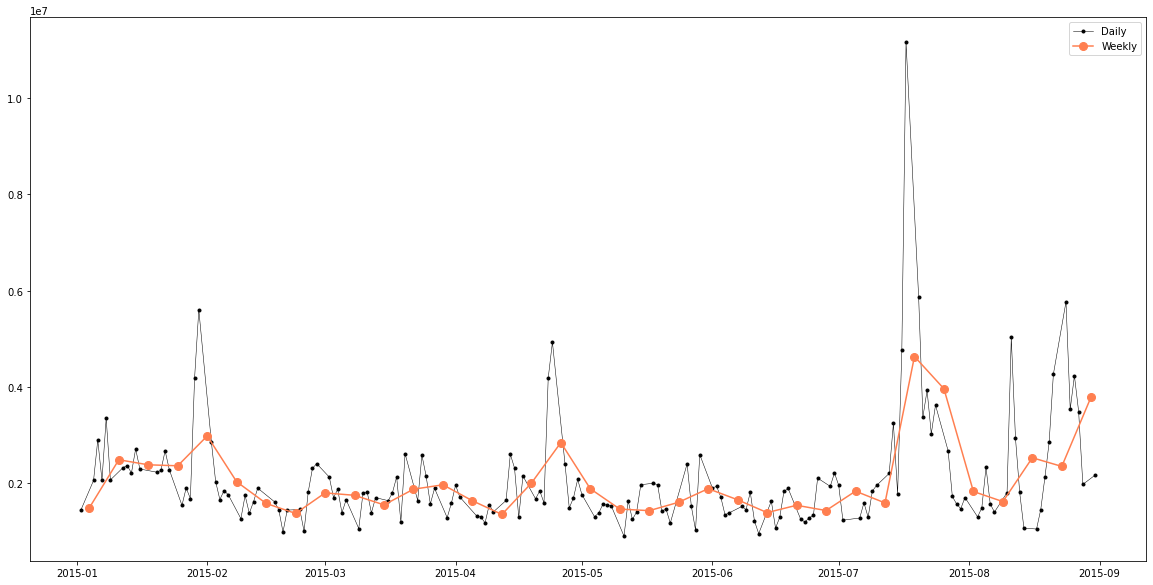

In [24]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2015-01':'2015-08', 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2015-01':'2015-08', 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.legend()

In [26]:
roll_10=df.rolling(7, center=True).mean()

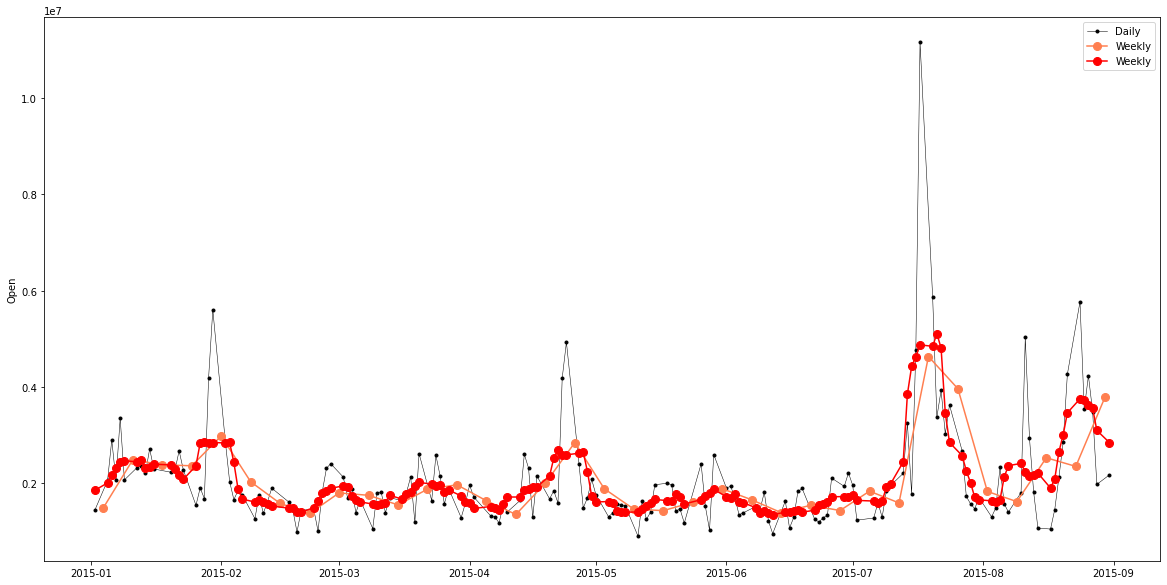

In [27]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2015-01':'2015-08', 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2015-01':'2015-08', 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.plot(roll_10.loc['2015-01':'2015-08', 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='red')
plt.ylabel("Open")
plt.legend()

<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">Link for Pandas Rolling<a>


### Decomposition

Decomposition will show the observations and these three elements in the same plot:

Trend: Consistent upward or downward slope of a time series.

Seasonality: Clear periodic pattern of a time series

Noise: Outliers or missing values

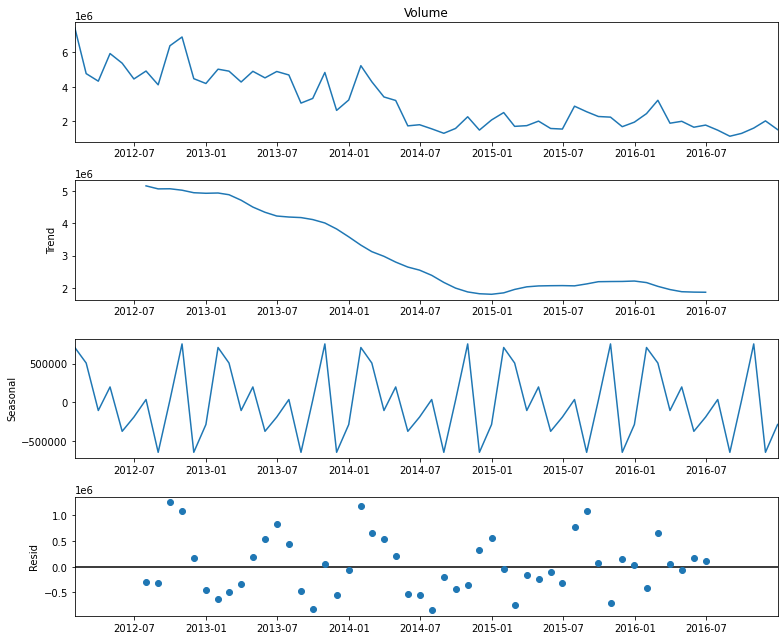

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
fig = decomposition.plot()


TypeError: 'DecomposeResult' object is not subscriptable

Here the trend is the moving average. To give you a high-level idea of residuals in the last row, here is the general formula:

Original observations = Trend + Seasonality + Residuals

Though the documentation for decomposition itself says that it’s a very naive representation but it is still popular.

## Stationarity
‘Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.


## Dickey-Fuller test

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
  
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [23]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Volume"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.477296
p-value: 0.008590
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

## Types of Stationarity

Let us understand the different types of stationarities and how to interpret the results of the above tests.

Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.
    
Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.
    
Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.


In [ ]:
df["Volume"].plot()

### Differencing

In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

In [ ]:
df['Volume1'] = df['Volume'] -df['Volume'].shift(1)

In [ ]:
df["Volume1"].plot()

Seasonal Differencing

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

In [ ]:
n=7
df['Volume2'] = df['Volume'] -df['Volume'].shift(n)

In [ ]:
df["Volume2"].plot()

Transformation

Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on dataset.

In [ ]:
df['Volumn3'] = np.log(df["Volume"])
df['Vol_log_diff'] = df['Volumn3'] - df['Volumn3'].shift(1)
df['Vol_log_diff'].plot()